In [1]:
%matplotlib nbagg
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.animation as animation

In [2]:
df = pd.read_csv("F:/Sarvgya/_VII sem/Data Science/Chennai water crisis/dataset/chennai_reservoir_levels.csv")
s = pd.to_datetime(df['Date'],dayfirst=True)
df.drop('Date',axis=1,inplace=True)
df['Date'] = s

<IPython.core.display.Javascript object>


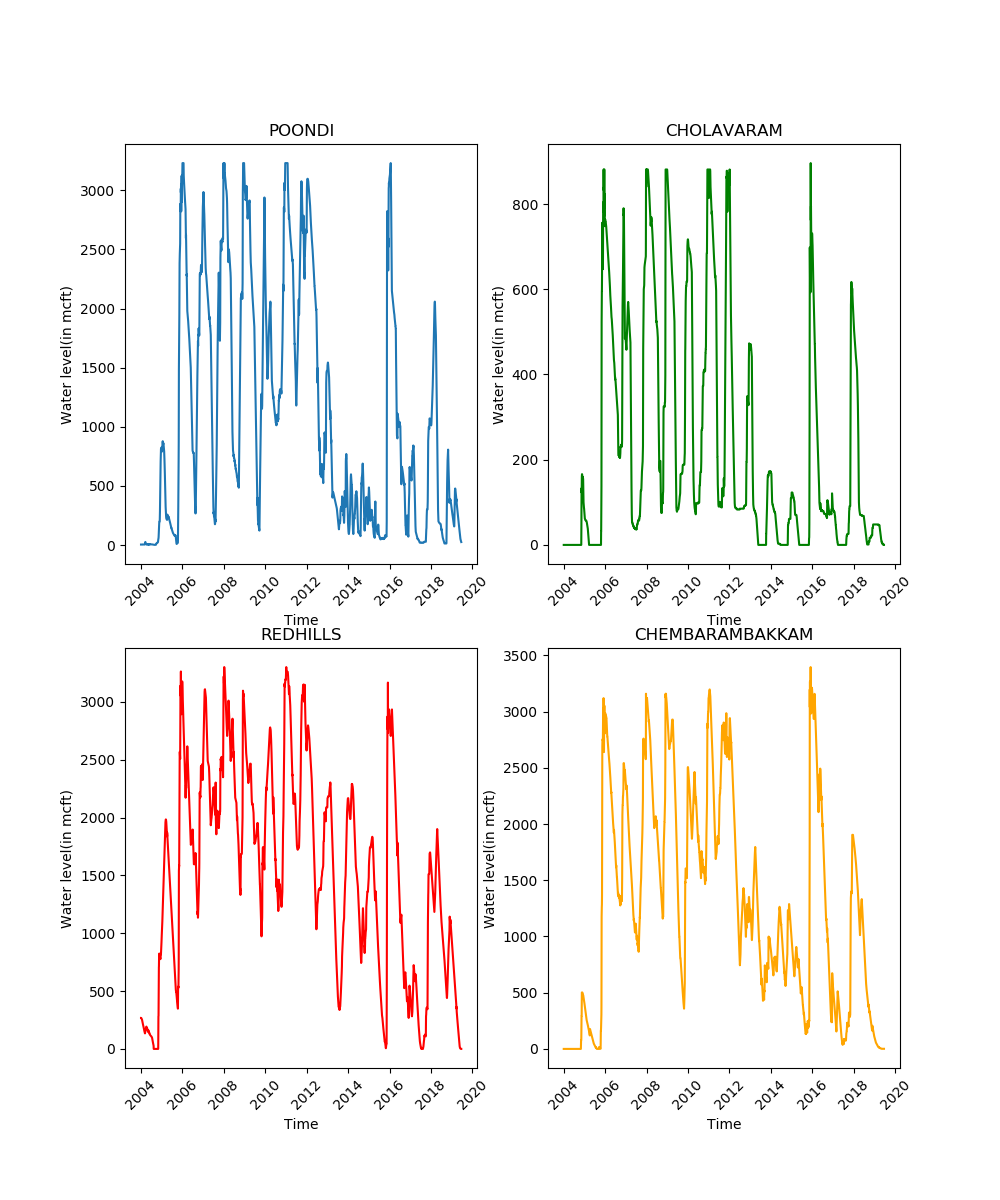

Text(0, 0.5, 'Water level(in mcft)')

In [10]:
fig, axs = plt.subplots(2, 2,figsize=(10,12))
axs[0,0].plot(df['Date'],df['POONDI'])
axs[0,0].set_title("POONDI")
for tick in axs[0,0].get_xticklabels():
    tick.set_rotation(45)

axs[0,1].plot(df['Date'],df['CHOLAVARAM'],color="g")
axs[0,1].set_title("CHOLAVARAM")
for tick in axs[0,1].get_xticklabels():
    tick.set_rotation(45)

axs[1,0].plot(df['Date'],df['REDHILLS'],color="r")
axs[1,0].set_title("REDHILLS")
for tick in axs[1,0].get_xticklabels():
    tick.set_rotation(45)

axs[1,1].plot(df['Date'],df['CHEMBARAMBAKKAM'],color="orange")
axs[1,1].set_title("CHEMBARAMBAKKAM")
for tick in axs[1,1].get_xticklabels():
    tick.set_rotation(45)

axs[0,0].set_xlabel("Time")
axs[0,1].set_xlabel("Time")
axs[1,0].set_xlabel("Time")
axs[1,1].set_xlabel("Time")
axs[0,0].set_ylabel("Water level(in mcft)")
axs[0,1].set_ylabel("Water level(in mcft)")
axs[1,0].set_ylabel("Water level(in mcft)")
axs[1,1].set_ylabel("Water level(in mcft)")

In [5]:
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)


<IPython.core.display.Javascript object>


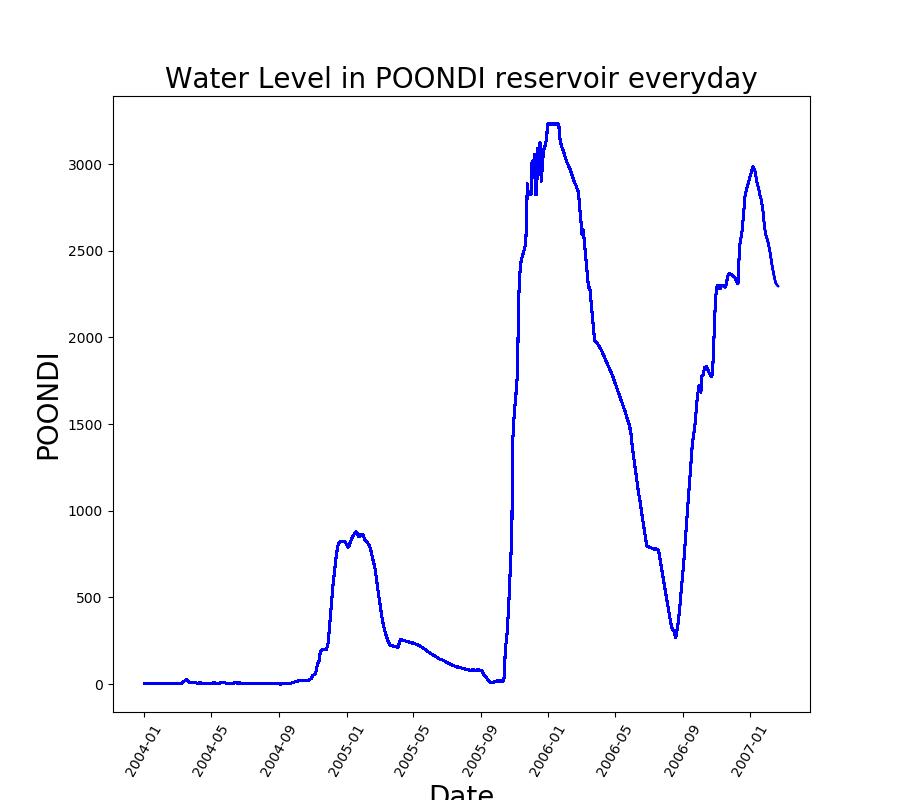

In [4]:
# df = df[:int(500)]
d = pd.DataFrame(df[['Date','POONDI']])

fig = plt.figure(figsize=(9,8))
# plt.xlim(-10, 310)
# plt.ylim(-1, 32)
plt.xlabel('Time',fontsize=20)
plt.ylabel('MCFT',fontsize=20)
plt.title('Water Level in POONDI reservoir everyday',fontsize=20)

# animation function
def animate(i):
    data = d.iloc[:int(i+100)]                 #selecting data range
    p = sns.lineplot(x=data['Date'], y=data['POONDI'], data=data, color="b")
    for tick in p.get_xticklabels():
        tick.set_rotation(60)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,interval=10)
#anim.save('basic_animation.mp4', fps=30)


plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

image = Image.open("poondi_basemap1_highdef.jpg")
# width, height = image.size
# center = (int(0.5 * width), int(0.5 * height))
center = (650,350)
yellow = (255, 255, 0, 255)
ImageDraw.floodfill(image, xy=center, value=yellow)
image.save("output3.jpg")

In [9]:
from tkinter import *
from PIL import ImageTk,Image
import time

root = Tk()
root.geometry('1350x580')
root.title("SARVGYA")
photo = ImageTk.PhotoImage(Image.open("all_reservoir.jpg"))

time.sleep(3)
c = Canvas(root, height=680, width=1350, bg='white')
c.pack()

def frame(date,p,che,r,cho):
#     root.update_idletasks()
    c.update_idletasks()
    c.delete("all")
    c.create_image(0,0,image=photo, anchor=NW)
    
    c.create_rectangle(440, 210-p/16,470,210,fill='pink')
    c.create_text(455,220,font="Times 9 bold",text="POONDI")
    c.create_text(455,200-p/16,font="Times 9 bold",text=str(p))

    
    c.create_rectangle(720,475-che/16,750,475,fill='cyan')
    c.create_text(735,485,font="Times 9 bold",text="CHEMBARAMBAKKAM")
    c.create_text(735,465-che/16,font="Times 9 bold",text=str(che))
    
    c.create_rectangle(910,250-r/16,940,250,fill='yellow')
    c.create_text(925,260,font="Times 9 bold",text="REDHILLS")
    c.create_text(925,240-r/16,font="Times 9 bold",text=str(r))

    c.create_rectangle(830,140-cho/16,860,140,fill='magenta')
    c.create_text(845,150,font="Times 8 bold",text="CHOLAVARAM")
    c.create_text(845,130-cho/16,font="Times 9 bold",text=str(cho))
    
    c.create_rectangle(1150,490,1290,510,fill='#ededed')
    c.create_text(1180,500,font="Times 11 bold",text="DATE: ")
    c.create_text(1245,500,font="Times 11 bold",text=str(date)[:10])
    
    c.create_rectangle(1150,300,1340,430,fill="#ededed")
    c.create_rectangle(1160,400,1180,420,fill='pink')
    c.create_text(1220,410,font="Times 10 bold",text="POONDI")
    c.create_rectangle(1160,370,1180,390,fill='cyan')
    c.create_text(1262,380,font="Times 10 bold",text="CHEMBARAMBAKKAM")
    c.create_rectangle(1160,340,1180,360,fill='yellow')
    c.create_text(1225,350,font="Times 10 bold",text="REDHILLS")
    c.create_rectangle(1160,310,1180,330,fill='magenta')
    c.create_text(1240,320,font="Times 10 bold",text="CHOLAVARAM")
    
    c.create_line(1150,450,1170,450)
    c.create_line(1160,450,1160,470)
    c.create_line(1150,470,1170,470)
    c.create_text(1210,460,font="Times 10 bold",text="=  320 MCFT")

df
for i in df.index:
    root.after(i*70,frame,df["Date"][i],df["POONDI"][i],df["CHEMBARAMBAKKAM"][i],df["REDHILLS"][i],df["CHOLAVARAM"][i])
    
root.mainloop()

In [ ]:
## ffmpeg -f gdigrab -framerate 30 -i title="SARVGYA" -b:v 3M -video_size 1024x768 record.mp4